In [1]:
# importation des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
# importation du jeu donnee et affichage
dt = pd.read_csv('books.csv', delimiter=',',on_bad_lines='skip')
dt.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591.0,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221.0,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244.0,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325.0,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164.0,9/13/2004,Scholastic


In [3]:
#  description du jeu de données
dt.describe()

,bookID,isbn13,ratings_count,text_reviews_count
count,11125.000000,1.112500e+04,1.112500e+04,11125.000000
mean,21309.644944,9.758126e+12,1.793968e+04,541.958562
std,13093.899795,4.618564e+11,1.124893e+05,2576.396616
min,1.000000,6.748421e+08,0.000000e+00,0.000000
25%,10285.000000,9.780345e+12,1.040000e+02,9.000000
50%,20264.000000,9.780582e+12,7.450000e+02,47.000000
75%,32104.000000,9.780872e+12,4.996000e+03,238.000000
max,45641.000000,9.790008e+12,4.597666e+06,94265.000000


In [4]:
# type des colonnes
dt.dtypes

bookID                  int64
title                  object
authors                object
average_rating         object
isbn                   object
isbn13                  int64
language_code          object
  num_pages            object
ratings_count           int64
text_reviews_count    float64
publication_date       object
publisher              object
dtype: object

In [5]:
# Toutes les lignes ou average_rating contient des lettres
masque = dt['average_rating'].astype(str).str.contains(r'[a-zA-Z]', na=False)

# Afficher ces lignes
print(dt[masque][['average_rating', 'authors', 'title']])

                                         average_rating  \
3348                                  Jr./Sam B. Warner   
4702   one of the founding members of this Tolkien w...   

                                       authors  \
3348                           Sam Bass Warner   
4702  David E. Smith (Turgon of TheOneRing.net   

                                                  title  
3348  Streetcar Suburbs: The Process of Growth in Bo...  
4702                  The Tolkien Fan's Medieval Reader  


In [6]:
#afficher la lgne 3348
dt.loc[3348]

bookID                                                            12224
title                 Streetcar Suburbs: The Process of Growth in Bo...
authors                                                 Sam Bass Warner
average_rating                                        Jr./Sam B. Warner
isbn                                                               3.58
isbn13                                                        674842111
language_code                                             9780674842113
  num_pages                                                       en-US
ratings_count                                                       236
text_reviews_count                                                 61.6
publication_date                                              4/20/2004
publisher                                      Harvard University Press
Name: 3348, dtype: object

In [7]:
# suppression des lignes 
dt =dt.drop(index=3348)
dt = dt.drop(index= 4702)
dt = dt.reset_index(drop=True)

In [8]:
# formatage correcte de chaqque ligne
dt['publication_date'] = pd.to_datetime(dt['publication_date'], errors='coerce')
dt['average_rating'] = dt['average_rating'].astype(float)
dt['ratings_count'] = dt['ratings_count'].astype(int)
dt['  num_pages'] = dt['  num_pages'].astype(int)
dt['text_reviews_count'] = dt['text_reviews_count'].astype(int)
dt['isbn13'] = dt['isbn13'].astype(str)

# affichage des types
dt.dtypes

bookID                         int64
title                         object
authors                       object
average_rating               float64
isbn                          object
isbn13                        object
language_code                 object
  num_pages                    int32
ratings_count                  int32
text_reviews_count             int32
publication_date      datetime64[ns]
publisher                     object
dtype: object

In [9]:
# verification des valeurs manquantes
dt.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
dtype: int64

In [10]:
# suppresion des valeurs manquantes
dt.dropna(inplace=True)
dt.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [11]:
# verification des doublons 
dt.duplicated().sum()

0

<Axes: xlabel='average_rating'>

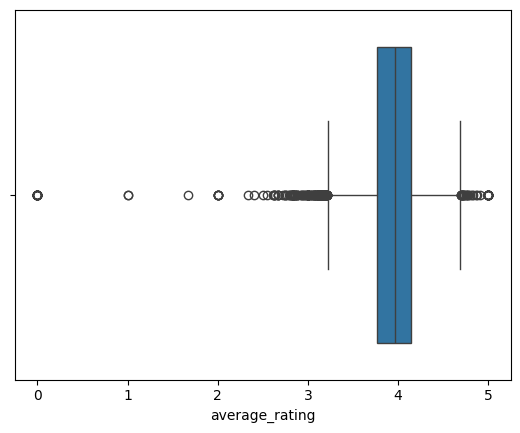

In [12]:
# diagrammes de distribution
sns.boxplot(x=dt['average_rating'])

In [13]:
# description detaillee des donnees
dt.describe()

,bookID,average_rating,num_pages,ratings_count,text_reviews_count,publication_date
count,11121.000000,11121.000000,11121.000000,1.112100e+04,11121.000000,11121
mean,21307.774301,3.934058,336.343944,1.794512e+04,542.118874,2000-08-29 03:05:33.099541504
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1900-01-01 00:00:00
25%,10270.000000,3.770000,192.000000,1.040000e+02,9.000000,1998-07-17 00:00:00
50%,20264.000000,3.960000,299.000000,7.450000e+02,47.000000,2003-03-01 00:00:00
75%,32104.000000,4.140000,416.000000,4.996000e+03,238.000000,2005-10-01 00:00:00
max,45641.000000,5.000000,6576.000000,4.597666e+06,94265.000000,2020-03-31 00:00:00
std,13093.542472,0.350513,241.129968,1.125091e+05,2576.845134,NaN


In [14]:
# affichage de la distribution de la variable cible
dt.average_rating.value_counts()

average_rating
4.00    219
3.96    194
4.02    178
3.94    176
4.07    172
       ... 
4.91      1
3.10      1
3.03      1
2.99      1
2.33      1
Name: count, Length: 209, dtype: int64

In [15]:
#creation de la variable cible par classification des livres
def rating_to_class(r):
    if r < 2.5:
        return "faible"
    elif r < 3.5:
        return "moyen"
    elif r < 4.5:
        return "bon"
    else:
        return "excellent"

dt["rating_class"] = dt["average_rating"].apply(rating_to_class)
dt.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_class
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,excellent
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,bon
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,2003-11-01,Scholastic,bon
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,excellent
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,2004-09-13,Scholastic,excellent


In [16]:
dt=dt.drop(columns=['bookID','isbn', 'isbn13'])
dt.head()

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,rating_class
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,excellent
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,bon
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,2003-11-01,Scholastic,bon
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,excellent
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,2690,41428,164,2004-09-13,Scholastic,excellent


In [17]:
#renomer la colonne '  num_pages
dt['num_pages']=dt['  num_pages']
dt.drop(columns=['  num_pages'], inplace=True)
dt.head()

,title,authors,average_rating,language_code,ratings_count,text_reviews_count,publication_date,publisher,rating_class,num_pages
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,2095690,27591,2006-09-16,Scholastic Inc.,excellent,652
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,2153167,29221,2004-09-01,Scholastic Inc.,bon,870
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,6333,244,2003-11-01,Scholastic,bon,352
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,2339585,36325,2004-05-01,Scholastic Inc.,excellent,435
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,41428,164,2004-09-13,Scholastic,excellent,2690


In [18]:
# selection de variables numeriques
numerical_cols = dt.select_dtypes(include=[np.number]).columns.tolist()


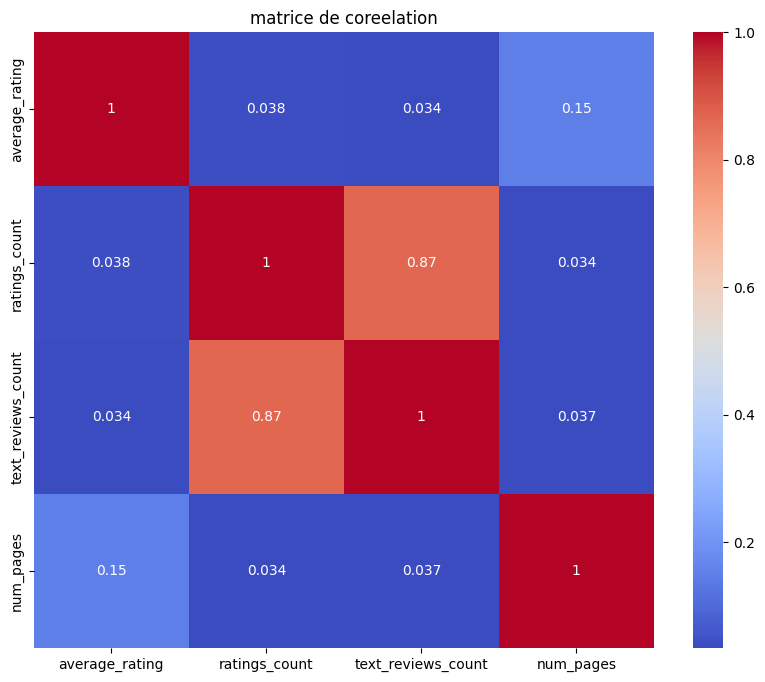

In [19]:
# affichage matrice de correlation
plt.figure(figsize=(10,8))
sns.heatmap(dt[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('matrice de coreelation')
plt.show()

In [20]:
from sklearn.preprocessing import OrdinalEncoder
#encodage de la variable cible
encoder = OrdinalEncoder(categories=[['faible', 'moyen', 'bon', 'excellent']])
dt['rating_class'] = encoder.fit_transform(dt[['rating_class']])
dt.head()

,title,authors,average_rating,language_code,ratings_count,text_reviews_count,publication_date,publisher,rating_class,num_pages
0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,2095690,27591,2006-09-16,Scholastic Inc.,3.0,652
1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,2153167,29221,2004-09-01,Scholastic Inc.,2.0,870
2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,6333,244,2003-11-01,Scholastic,2.0,352
3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,eng,2339585,36325,2004-05-01,Scholastic Inc.,3.0,435
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,eng,41428,164,2004-09-13,Scholastic,3.0,2690


In [21]:
dt= dt.drop(columns=['average_rating'])

In [22]:
# utilisation de pycaret
from pycaret.classification import*
exp = setup(dt, target='rating_class',train_size=0.8,session_id=123, normalize=True,
            normalize_method='minmax',fix_imbalance=True,fix_imbalance_method='SMOTE')

,Description,Value
0,Session id,123
1,Target,rating_class
2,Target type,Multiclass
3,Original data shape,"(11121, 9)"
4,Transformed data shape,"(34729, 11)"
5,Transformed train set shape,"(32504, 11)"
6,Transformed test set shape,"(2225, 11)"
7,Numeric features,3
8,Date features,1
9,Categorical features,4


In [23]:
# elements cree par pycaret
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [24]:
get_config('X_train_transformed')

,title,authors,language_code,ratings_count,text_reviews_count,publication_date_year,publication_date_month,publication_date_day,publisher,num_pages
8452,0.605109,0.513968,0.650483,4.406584e-04,0.000286,0.858333,0.909091,0.066667,0.576248,0.124848
9593,0.606432,0.507698,0.650483,8.417314e-05,0.000573,0.850000,0.454545,0.333333,0.649532,0.050943
4184,0.605109,0.506680,0.650483,1.239977e-03,0.002281,0.875000,0.727273,0.866667,0.547171,0.056265
7356,0.605109,0.506680,0.650483,3.173349e-04,0.001400,0.850000,0.272727,0.966667,0.499683,0.034672
7195,0.605109,0.507698,0.650483,9.054594e-04,0.002334,0.883333,0.545455,0.800000,0.534035,0.055961
...,...,...,...,...,...,...,...,...,...,...
34726,0.907663,0.739515,0.650483,3.087292e-05,0.000117,0.850000,0.545455,0.033333,0.853128,0.029888
34727,0.907663,0.729467,0.650483,6.383502e-07,0.000000,0.858333,0.818182,0.333333,0.739098,0.004440
34728,0.907663,0.649357,0.650483,2.076266e-06,0.000008,0.833333,0.454545,0.600000,0.670254,0.010039
34729,0.981396,0.853404,0.650483,1.589413e-04,0.000424,0.850000,0.545455,0.400000,0.669086,0.189559


In [27]:
# comparaison des modeles et entrainement de celui-ci
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.9206,0.5489,0.9206,0.9142,0.8899,0.1618,0.2781,0.8020
lr,Logistic Regression,0.9202,0.0000,0.9202,0.9160,0.8884,0.1463,0.2676,4.2480
rf,Random Forest Classifier,0.9191,0.6459,0.9191,0.9145,0.8858,0.1214,0.2440,4.8420
lda,Linear Discriminant Analysis,0.9191,0.0000,0.9191,0.9145,0.8858,0.1214,0.2440,0.4560
et,Extra Trees Classifier,0.9191,0.6470,0.9191,0.9145,0.8858,0.1214,0.2440,1.5010
lightgbm,Light Gradient Boosting Machine,0.9191,0.5913,0.9191,0.9145,0.8858,0.1214,0.2440,6.5240
catboost,CatBoost Classifier,0.9191,0.7464,0.9191,0.9145,0.8858,0.1214,0.2440,44.2700
nb,Naive Bayes,0.9188,0.5498,0.9188,0.9127,0.8857,0.1207,0.2406,0.4650
gbc,Gradient Boosting Classifier,0.9187,0.0000,0.9187,0.9116,0.8852,0.1166,0.2369,27.1050
dt,Decision Tree Classifier,0.9182,0.5385,0.9182,0.9063,0.8861,0.1295,0.2342,0.5960


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [28]:
new = get_config('dataset_transformed')
new.rating_class.value_counts()



rating_class
2.0    10158
1.0     8266
3.0     8172
0.0     8133
Name: count, dtype: int64

In [29]:
model= create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9180,0.5319,0.9180,0.9066,0.8832,0.1020,0.2196
1,0.9213,0.5573,0.9213,0.9192,0.8927,0.1918,0.2971
2,0.9169,0.5307,0.9169,0.8981,0.8839,0.1088,0.2023
3,0.9213,0.5513,0.9213,0.9097,0.8900,0.1664,0.2926
4,0.9225,0.5498,0.9225,0.9252,0.8921,0.1783,0.3136
5,0.9247,0.5644,0.9247,0.9271,0.8965,0.2184,0.3509
6,0.9190,0.5508,0.9190,0.9048,0.8885,0.1503,0.2518
7,0.9190,0.5379,0.9190,0.9163,0.8868,0.1334,0.2480
8,0.9201,0.5567,0.9201,0.9092,0.8909,0.1705,0.2737


In [30]:
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [39]:
#optimisation du modele
tuned_model = tune_model(model)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:00:29
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,K Neighbors Classifier


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9213,0.5444,0.9213,0.9276,0.8896,0.1581,0.2941
1,0.9225,0.5619,0.9225,0.9220,0.8936,0.1950,0.3135
2,0.9169,0.5451,0.9169,0.8981,0.8839,0.1088,0.2023
3,0.9247,0.5818,0.9247,0.9283,0.8972,0.2348,0.3521
4,0.9225,0.5613,0.9225,0.9137,0.8934,0.1950,0.3134
5,0.9225,0.5613,0.9225,0.9208,0.8947,0.2115,0.3169
6,0.9213,0.5822,0.9213,0.9119,0.8932,0.1902,0.2942
7,0.9190,0.5563,0.9190,0.9163,0.8868,0.1334,0.2480
8,0.9201,0.5681,0.9201,0.9069,0.8924,0.1866,0.2793


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [40]:
#enregistrement du model
save_model(tuned_model, 'book_rating_classifier')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('date_feature_extractor',
                  TransformerWrapper(exclude=None, include=['publication_date'],
                                     transformer=ExtractDateTimeFeatures(features=['day',
                                                                                   'month',
                                                                                   'year']))),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['ratings_count',
                                              'text_reviews_count',
                                              'num_pages'],
                                     transformer=SimpleImputer(add_indic...
                                     transformer=FixImbalancer(estimator=SMOTE(k_neighbors=5,
                                                                               random_state=123,
          